In [99]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


In [1]:
X, y = load_diabetes().data, load_diabetes().target
n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234) 

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float).view(-1,1)
y_test = torch.tensor(y_test, dtype=torch.float).view(-1,1)


NameError: name 'load_diabetes' is not defined

In [101]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
       super().__init__()
       self.linear = nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        return self.linear(x)
        

In [102]:
Model = LinearRegressionModel(n_features , 1)
Lossfcn = nn.MSELoss()
optimizer = optim.SGD(Model.parameters(),lr=0.001)

In [103]:
epoch_count = []
train_loss = []
Test_loss = [] 

epochs = 1000
for epoch in range(epochs):
    Model.train()
    optimizer.zero_grad()
    pred = Model(X_train)
    loss = Lossfcn(pred,y_train)
    loss.backward()
    optimizer.step()

    
    with torch.inference_mode():
        y_pred = Model(X_test)
        test_loss = Lossfcn(y_pred,y_test)  
    
    if (epoch - 1) % 10 == 0:
        print(f"epoch: {epoch - 1} <-------> loss: {loss.item():.4f}") 
        epoch_count.append(epoch)
        train_loss.append(loss)
        Test_loss.append(test_loss)  
    

epoch: 0 <-------> loss: 29070.3145
epoch: 10 <-------> loss: 27829.8789
epoch: 20 <-------> loss: 26669.8359
epoch: 30 <-------> loss: 25582.2852
epoch: 40 <-------> loss: 24560.3477
epoch: 50 <-------> loss: 23598.0215
epoch: 60 <-------> loss: 22690.0449
epoch: 70 <-------> loss: 21831.8125
epoch: 80 <-------> loss: 21019.2656
epoch: 90 <-------> loss: 20248.8184
epoch: 100 <-------> loss: 19517.2949
epoch: 110 <-------> loss: 18821.8750
epoch: 120 <-------> loss: 18160.0430
epoch: 130 <-------> loss: 17529.5430
epoch: 140 <-------> loss: 16928.3535
epoch: 150 <-------> loss: 16354.6387
epoch: 160 <-------> loss: 15806.7549
epoch: 170 <-------> loss: 15283.1914
epoch: 180 <-------> loss: 14782.5811
epoch: 190 <-------> loss: 14303.6689
epoch: 200 <-------> loss: 13845.2979
epoch: 210 <-------> loss: 13406.4092
epoch: 220 <-------> loss: 12986.0156
epoch: 230 <-------> loss: 12583.2100
epoch: 240 <-------> loss: 12197.1406
epoch: 250 <-------> loss: 11827.0166
epoch: 260 <-------> lo

In [104]:
Model.eval()
with torch.no_grad():
    predictions = Model(X_test)
    test_loss = Lossfcn(predictions, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 3079.6531


In [105]:
predictions_np = predictions.numpy()
y_test_np = y_test.numpy()
mse = mean_squared_error(predictions_np,y_test_np)
r2 = r2_score(predictions_np,y_test_np)


3079.6523

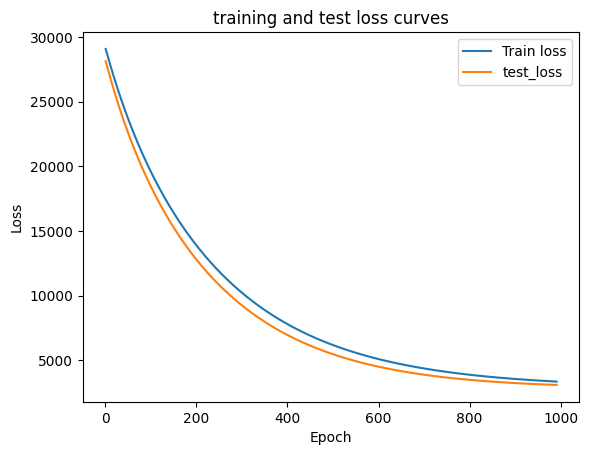

In [106]:
plt.plot(epoch_count,np.array(torch.tensor(train_loss).cpu().numpy()),label="Train loss")
plt.plot(epoch_count,np.array(torch.tensor(Test_loss).cpu().numpy()),label="test_loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()